In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


EDA

In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

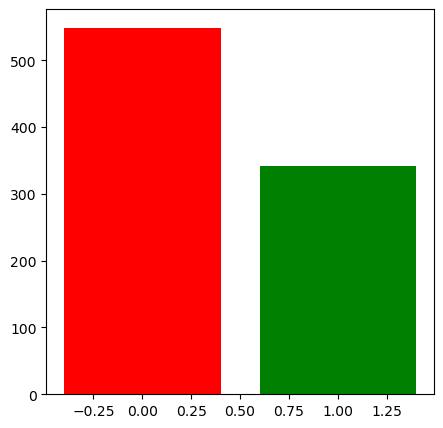

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=["r","g"])
plt.show()        

In [9]:
titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

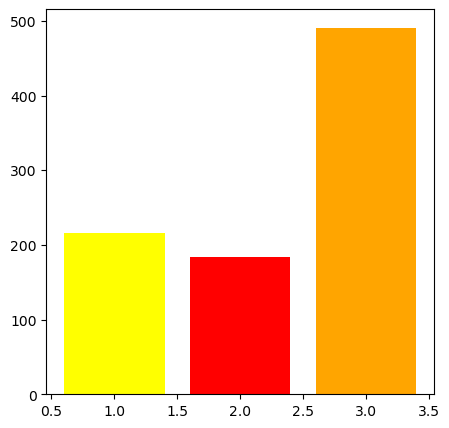

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["orange","yellow","red"])
plt.show()        

In [11]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

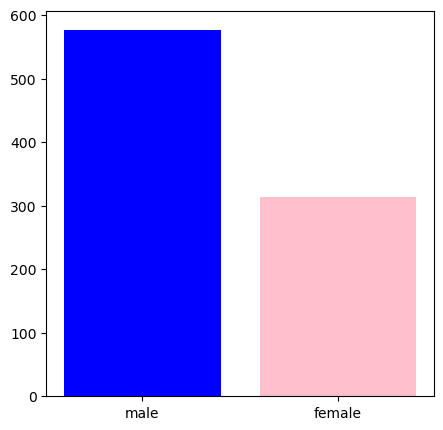

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=["blue","pink"])
plt.show()        

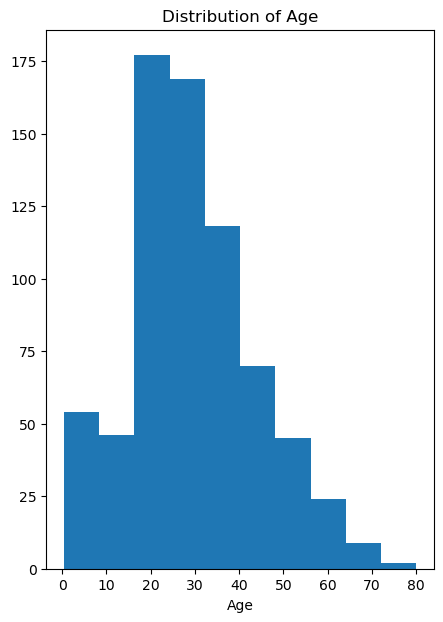

In [13]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

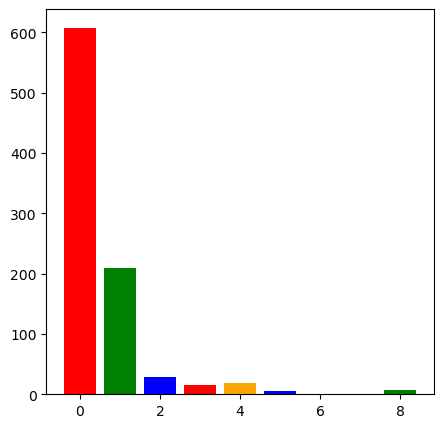

In [14]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['SibSp'].value_counts().keys()), list(titanic_train['SibSp'].value_counts()), color=['red','green','blue','orange'])
plt.show()

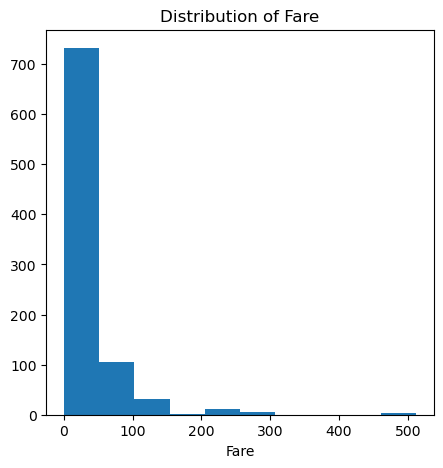

In [15]:
plt.figure(figsize=(5,5))
plt.hist(titanic_train['Fare'])
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.show()

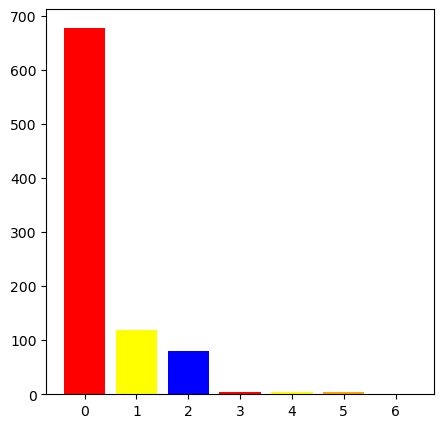

In [16]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Parch'].value_counts().keys()), list(titanic_train['Parch'].value_counts()), color=['red','yellow','blue','orange'])
plt.show()

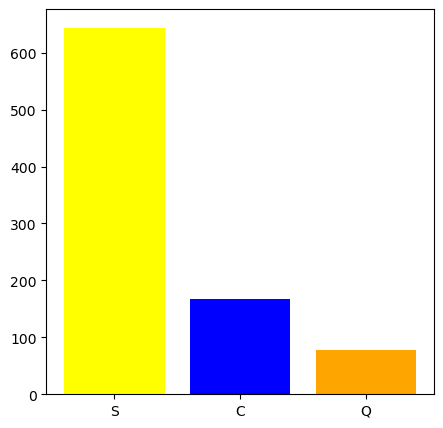

In [17]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Embarked'].value_counts().keys()), list(titanic_train['Embarked'].value_counts()), color=['yellow','blue','orange'])
plt.show()

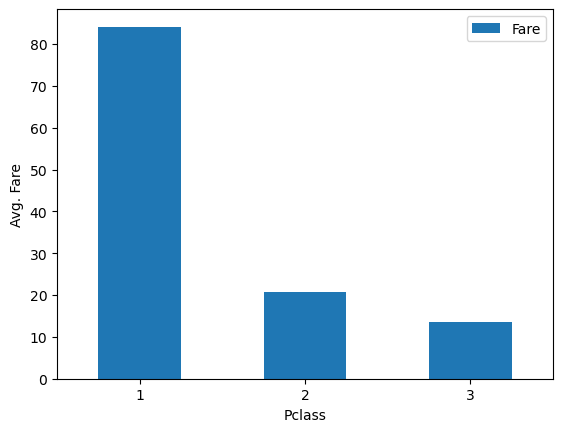

In [18]:
class_fare = titanic_train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

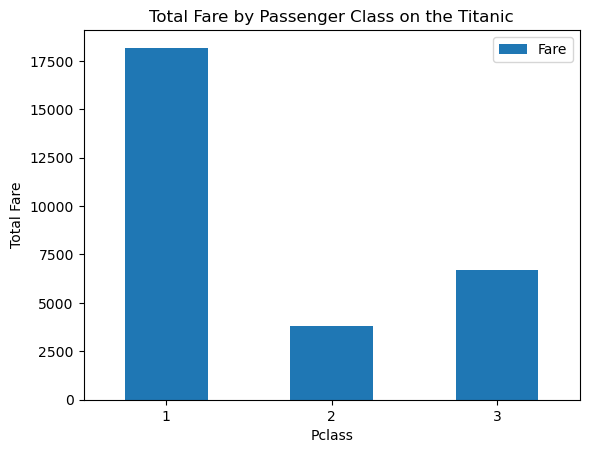

In [19]:
class_fare = titanic_train.pivot_table(index='Pclass', values='Fare', aggfunc = 'sum')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.title('Total Fare by Passenger Class on the Titanic')
plt.show()

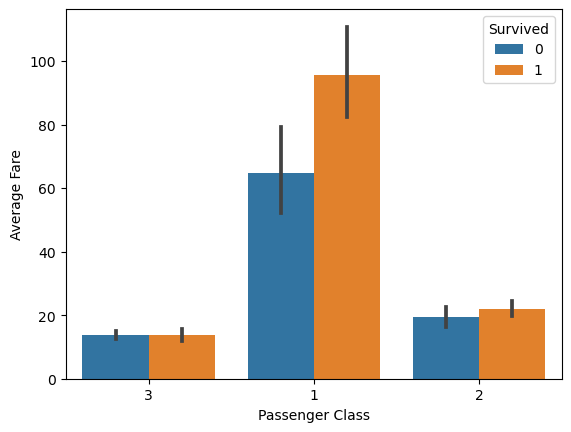

In [20]:
titanic_train['Pclass'] = titanic_train['Pclass'].astype(str)
titanic_train['Survived'] = titanic_train['Survived'].astype(str)
sns.barplot(data=titanic_train, x='Pclass', y='Fare', hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

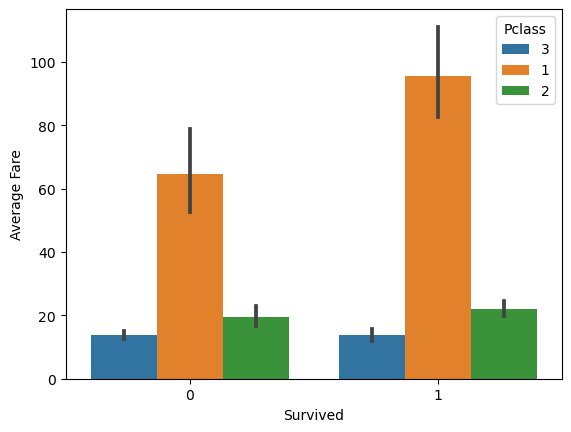

In [21]:
titanic_train['Pclass'] = titanic_train['Pclass'].astype(str)
sns.barplot(data=titanic_train, x='Survived', y='Fare', hue='Pclass')
plt.xlabel('Survived')
plt.ylabel('Average Fare')
plt.show()

In [22]:
titanic_train_len = len(titanic_train)
# combine two dataframes
df = pd.concat([titanic_train, titanic_test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [25]:
df = df.drop(columns=['Cabin'], axis=1)

In [26]:
df['Age'].mean()

29.881137667304014

In [27]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [28]:
df['Embarked'].mode()[0]

'S'

In [29]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: >

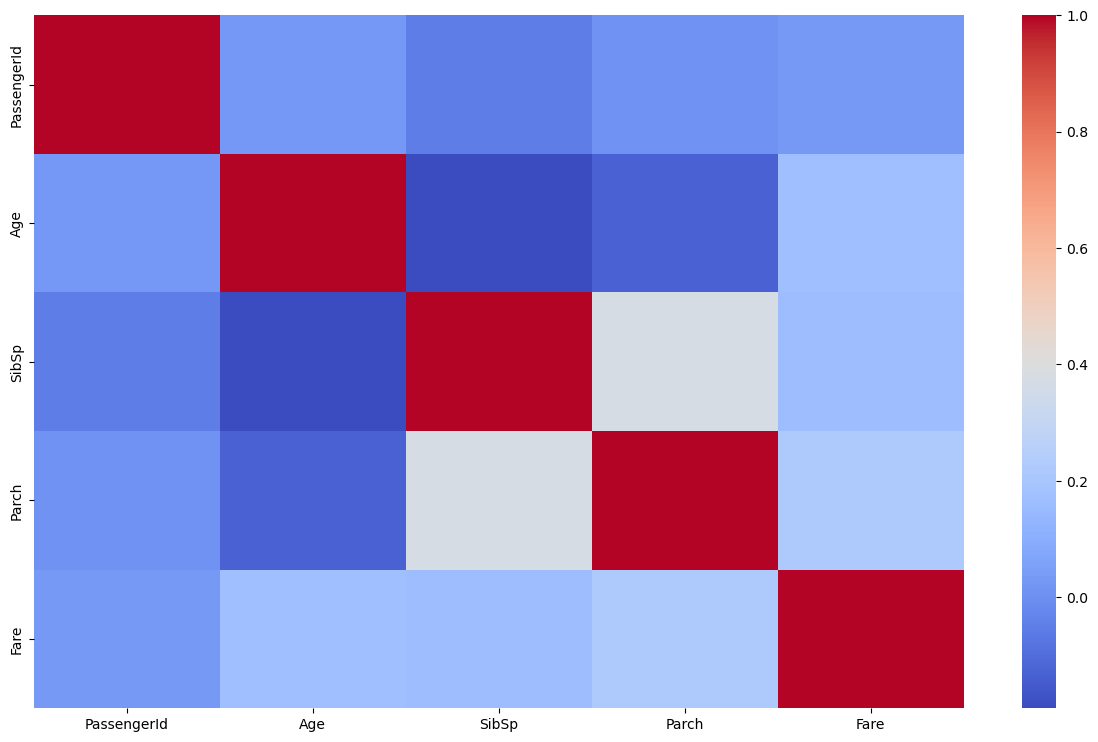

In [30]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr,cmap='coolwarm')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [34]:
titanic_train = df.iloc[:titanic_train_len, :]
titanic_test = df.iloc[titanic_train_len:, :]

In [35]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [36]:
titanic_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,7.8292,1
892,893,NaN,3,0,47.0,1,0,7.0000,2
893,894,NaN,2,1,62.0,0,0,9.6875,1
894,895,NaN,3,1,27.0,0,0,8.6625,2
895,896,NaN,3,0,22.0,1,1,12.2875,2


In [37]:
X = titanic_train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = titanic_train['Survived']

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np


def classify(model, X, y):
    try:
        # Split the data into training and test sets
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
        # Fit the model on the training data
        model.fit(x_train, y_train)
        
        # Calculate and print the accuracy on the test set
        accuracy = model.score(x_test, y_test)
        print('Accuracy:', accuracy)
        
        # Perform cross-validation and print the mean score
        score = cross_val_score(model, X, y, cv=5)
        print('CV Score:', np.mean(score))
    except Exception as e:
        print("An error occurred:", e)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 0.8071748878923767
CV Score: 0.786761659657272


C:\Users\Ram\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ram\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 0.7399103139013453
CV Score: 0.7710815391375306


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 0.7982062780269058
CV Score: 0.8002761910740066


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 0.7892376681614349
CV Score: 0.7890465130876907


In [44]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model, X, y)

An error occurred: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['0' '1']


In [45]:
!pip install lightgbm

In [46]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model, X, y)

An error occurred: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Pclass: object


In [47]:
!pip install catboost

In [48]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model, X, y)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


In [49]:
titanic_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,7.8292,1
892,893,NaN,3,0,47.0,1,0,7.0000,2
893,894,NaN,2,1,62.0,0,0,9.6875,1
894,895,NaN,3,1,27.0,0,0,8.6625,2
895,896,NaN,3,0,22.0,1,1,12.2875,2


In [50]:
X_titanic_test = titanic_test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [51]:
X_titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,7.8292,1
892,3,0,47.0,1,0,7.0000,2
893,2,1,62.0,0,0,9.6875,1
894,3,1,27.0,0,0,8.6625,2
895,3,0,22.0,1,1,12.2875,2


In [52]:
pred = model.predict(X_titanic_test)
pred

array(['0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1',
       '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0